# Лекция 2. Описательные статистики. Ящики с усами. Выбросы.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
AH = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False) # Элемент таблицы

### Построение графиков box-plot 

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64


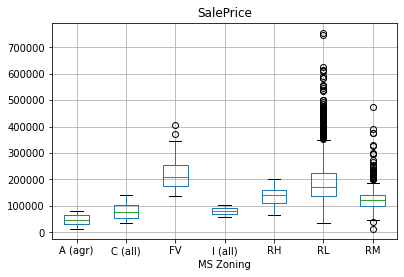

In [3]:
ax = AH.boxplot(column='SalePrice', by='MS Zoning')
# Хак для того, чтобы исправить наезжающие заголовки графика
ax.get_figure().suptitle('')
print (AH['MS Zoning'].value_counts())

### Построение диаграмм рассеивания (Scatter Plot)

In [5]:
df = pd.read_csv('swiss_bank_notes.csv', index_col=0)
df.head()

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8


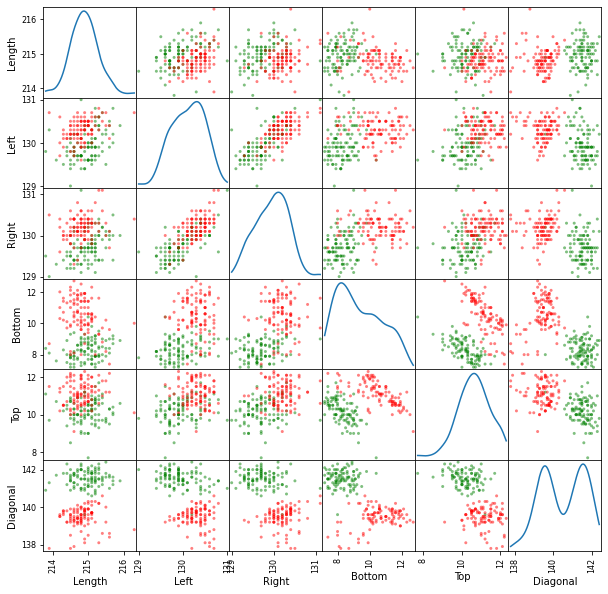

In [6]:
from pandas.plotting import scatter_matrix
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,
               # размер картинки
               figsize=(10, 10),
               # ядерная ф-я плотности вместо гистограммы на диагонали
               diagonal='kde',
               # цвета классов
               c=df['Status'].replace(colors),
               # степень прозрачности точек
               alpha=0.5,
              );

Можно построить отдельные диаграммы рассеивания, например, для пары признаков ```Top``` и ```Bottom```.

<AxesSubplot:xlabel='Top', ylabel='Bottom'>

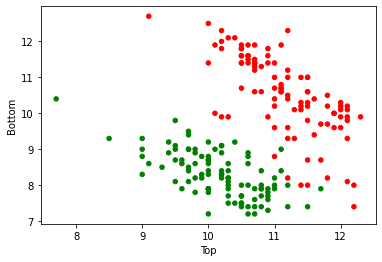

In [7]:
df.plot.scatter(x='Top', y='Bottom', c=df['Status'].replace(colors))

### Построение столбчатых диаграмм 

In [9]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [10]:
# Нужно, чтобы подписи к картинкам отображались корректно по-русски
matplotlib.rc('font', family='Arial')

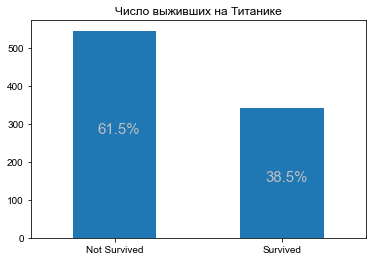

In [11]:
# Строим картинку
df['Survived'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'Число выживших на Титанике')
plt.xticks([0, 1], ['Not Survived', 'Survived'], rotation=None)
plt.text(-0.1, 275, '61.5%', fontsize=15, color='silver')
plt.text(0.9, 150, '38.5%', fontsize=15, color='silver');

### Построение круговых диаграмм 

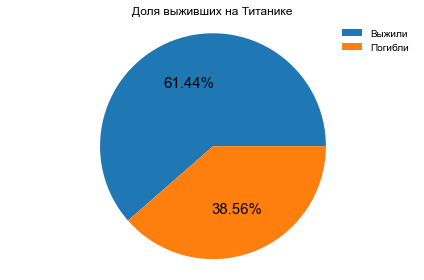

In [12]:
fig, ax = plt.subplots(1)
df['Survived'].value_counts().plot(kind='pie', labels=['', ''],
                                   ax=ax, autopct='%.2f%%', fontsize=15)
ax.set_title(u'Доля выживших на Титанике')
ax.axis('equal')
ax.legend(labels=[u'Выжили', u'Погибли'], framealpha=0)
ax.set_ylabel('')
plt.tight_layout()